# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading & Preprocessing

## Extract Meta Data

In [2]:
from src.MetaDataExtractor import LVMetadataExtractor

extractor = LVMetadataExtractor("Data/LV Rohbauarbeiten Einfamilienhaus.pdf")

# Extract Meta Data from first page
first_page_meta = extractor.extract_first_page_metadata()
# Extract header from one specific page
header_page_1 = extractor.extract_first_header()
combined_dict = extractor.combine_to_dict()

In [3]:
first_page_meta, header_page_1, combined_dict,vor_schlussbemerkung = extractor.main()

In [4]:
combined_dict

{'first_page_metadata': {'Projekt_Name_ErsteSeite': 'Neubau eines Einfamilienhauses mit PKW-Garage',
  'Bauherr': '',
  'Bauantragsplanung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Ausführungsplanung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Bauleitung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Ausführungszeitraum': 'Nach Vereinbarung (Vom Bieter ist der frühest mögliche Ausführungsbeginn anzugeben)',
  'Ausführungsbeginn': 'März 2020',
  'Angebotssumme Netto': '€ €',
  'Mehrwertsteuer (19 %)': '€ €',
  'Angebotssumme Brutto': '€ €',
  'Angebotsabgabe': 'Ingenieurbüro Wagner und Koll Elsa-Brändström-Straße 26 52477 Alsdorf',
  'Bieter': '',
  'LV': '001 Rohbauarbeiten'},
 'header_metadata': {'total_header_data': 'Ingenieurbüro Wagner und Koll -- Elsa-Brändström-Straße 26 -- 52477 Alsdorf Tel.:02404 / 26555 -- Fax:02404 / 1085 -- E-mail: alsdorf@wk-statik.de Projekt: 2020 Muster Webseite 29.05.2020 LV: 001 Rohbauarbeiten',
  'Unternehmen': 'Ingenieurbüro Wagner und Koll',


In [5]:
print(header_page_1.get("Unternehmen"))

Ingenieurbüro Wagner und Koll


## Extract Position related Data

In [6]:
from src.PDFPositionExtractor import PDFPositionExtractor
import pandas as pd
pdfextractor = PDFPositionExtractor("Data/LV Rohbauarbeiten Einfamilienhaus.pdf")
df = pdfextractor.main()

# General Overview 

## Data Types

In [7]:
df.dtypes

Section                string[python]
SectionHint            string[python]
Position               string[python]
MainDescription        string[python]
DetailedDescription    string[python]
Quantity                      float64
Unit                   string[python]
Page                            int32
position_level_1                int32
position_level_2                int32
dtype: object

## Insights on missing data

In [8]:
# Total missing values per column
na_counts = df.isna().sum()
na_percentage = (na_counts / len(df)) * 100

na_summary = pd.DataFrame({
    'NA Count': na_counts,
    'NA Percentage': na_percentage.round(2)
}).sort_values('NA Count', ascending=False)

print(na_summary)

                     NA Count  NA Percentage
SectionHint                66           66.0
Unit                        2            2.0
DetailedDescription         1            1.0
Quantity                    1            1.0
Section                     0            0.0
MainDescription             0            0.0
Position                    0            0.0
Page                        0            0.0
position_level_1            0            0.0
position_level_2            0            0.0


In [9]:
df[df['Unit'].isna()==True]

,Section,SectionHint,Position,MainDescription,DetailedDescription,Quantity,Unit,Page,position_level_1,position_level_2
93,Erdarbeiten,<NA>,8...3,Wiederverfüllung der Arbeitsräume,Wiederverfüllung der Arbeitsräume mit seitl. g...,7.0,<NA>,36,8,3
97,Positionen nach LV Auswertung,<NA>,9...1,Prüfprotokoll Erdung,<NA>,NaN,<NA>,38,9,1


In [10]:
df[df['Quantity'].isna()==True]

,Section,SectionHint,Position,MainDescription,DetailedDescription,Quantity,Unit,Page,position_level_1,position_level_2
97,Positionen nach LV Auswertung,<NA>,9...1,Prüfprotokoll Erdung,<NA>,NaN,<NA>,38,9,1


In [11]:
df[df['DetailedDescription'].isna()==True]

,Section,SectionHint,Position,MainDescription,DetailedDescription,Quantity,Unit,Page,position_level_1,position_level_2
97,Positionen nach LV Auswertung,<NA>,9...1,Prüfprotokoll Erdung,<NA>,NaN,<NA>,38,9,1


Results:
- Second Hint has many NAs as it contains the Hints of the main position. Not all main positions have hints.
- Prüfprotokoll Erdung (Position 9.1) has no Unit, Quantity or Detailed Description as it has none in the original pdf

## Empty Rows

In [12]:
empty_rows = df.isna().all(axis=1).sum()
print(f"Completely empty rows: {empty_rows}")

Completely empty rows: 0


# Insights on Leistungsverzeichnis

## Metadata

In [13]:
combined_dict

{'first_page_metadata': {'Projekt_Name_ErsteSeite': 'Neubau eines Einfamilienhauses mit PKW-Garage',
  'Bauherr': '',
  'Bauantragsplanung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Ausführungsplanung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Bauleitung': 'Ingenieurbüro Wagner und Koll, Alsdorf',
  'Ausführungszeitraum': 'Nach Vereinbarung (Vom Bieter ist der frühest mögliche Ausführungsbeginn anzugeben)',
  'Ausführungsbeginn': 'März 2020',
  'Angebotssumme Netto': '€ €',
  'Mehrwertsteuer (19 %)': '€ €',
  'Angebotssumme Brutto': '€ €',
  'Angebotsabgabe': 'Ingenieurbüro Wagner und Koll Elsa-Brändström-Straße 26 52477 Alsdorf',
  'Bieter': '',
  'LV': '001 Rohbauarbeiten'},
 'header_metadata': {'total_header_data': 'Ingenieurbüro Wagner und Koll -- Elsa-Brändström-Straße 26 -- 52477 Alsdorf Tel.:02404 / 26555 -- Fax:02404 / 1085 -- E-mail: alsdorf@wk-statik.de Projekt: 2020 Muster Webseite 29.05.2020 LV: 001 Rohbauarbeiten',
  'Unternehmen': 'Ingenieurbüro Wagner und Koll',


## Sub Position Count per Position

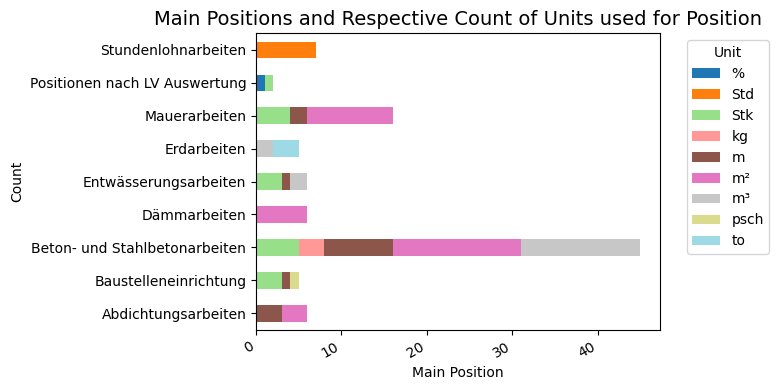

In [14]:
df_grouped = df[['Unit','Section','MainDescription']].groupby(['Section','Unit']).count()
df_pivot = df_grouped['MainDescription'].unstack(fill_value=0)
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(8,4), colormap='tab20')

plt.title('Main Positions and Respective Count of Units used for Position', fontsize=14)
plt.xlabel('Main Position')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Unit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

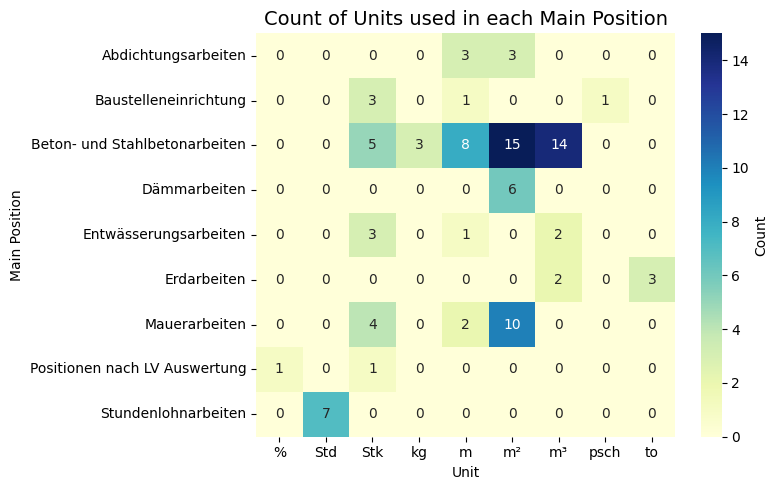

In [15]:
# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})

plt.title('Count of Units used in each Main Position', fontsize=14)
plt.xlabel('Unit')
plt.ylabel('Main Position')
plt.tight_layout()
plt.show()